In [ ]:
!pip3 install pycaret

     |████████████████████████████████| 81kB 4.4MB/s 
ERROR: pandas-profiling 2.11.0 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving GME_TRAIN.xlsx to GME_TRAIN.xlsx


In [ ]:
data_classification = pd.read_excel('GME_TRAIN.xlsx')

In [ ]:
data_classification.head()

,created_date,GME Mentions,Buy Mentions,Shares Mentions,Squeeze Mentions,Moon Mentions,Hold Mentions,GME_PRICE.Open,GME_PRICE.High,GME_PRICE.Low,GME_PRICE.Close,GME_PRICE.Volume,Increase
0,2018-02-07,0,23,1,1,3,7,16.16,16.67,16.15,16.47,4413087,1
1,2018-02-08,0,18,7,0,2,7,16.45,16.55,15.76,15.83,4286732,0
2,2018-02-09,0,21,1,0,2,7,15.98,16.33,15.67,16.17,5640876,1
3,2018-02-12,0,17,0,1,1,6,16.29,16.33,15.62,15.80,2431834,0
4,2018-02-13,0,11,1,0,2,3,15.76,15.86,15.49,15.58,2463431,0


In [ ]:
from pycaret.utils import version
version()

'2.3.0'

In [ ]:
from pycaret import classification

In [ ]:
classification_setup = classification.setup(data= data_classification, target='Increase')

,Description,Value
0,session_id,6716
1,Target,Increase
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(753, 13)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6415,0.6393,0.6000,0.6250,0.6122,0.2792,0.2794
1,0.6226,0.6171,0.5200,0.6190,0.5652,0.2363,0.2391
2,0.6226,0.6171,0.5200,0.6190,0.5652,0.2363,0.2391
3,0.4340,0.4300,0.3600,0.3913,0.3750,-0.1406,-0.1410
4,0.6226,0.6193,0.5600,0.6087,0.5833,0.2396,0.2403
5,0.4717,0.4679,0.4000,0.4348,0.4167,-0.0646,-0.0647
6,0.5094,0.5100,0.5200,0.4815,0.5000,0.0199,0.0200
7,0.6538,0.6519,0.6000,0.6522,0.6250,0.3046,0.3055
8,0.5000,0.5052,0.6400,0.4848,0.5517,0.0102,0.0108
9,0.5000,0.5007,0.5200,0.4815,0.5000,0.0015,0.0015


In [ ]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6795,0.7165,0.612,0.6759,0.6413,0.3535,0.3552,0.027
lightgbm,Light Gradient Boosting Machine,0.6567,0.7218,0.600,0.6482,0.6215,0.3085,0.3102,0.103
gbc,Gradient Boosting Classifier,0.6091,0.6405,0.552,0.6017,0.5720,0.2131,0.2162,0.169
dt,Decision Tree Classifier,0.5578,0.5558,0.524,0.5398,0.5294,0.1122,0.1130,0.024
knn,K Neighbors Classifier,0.5522,0.5193,0.476,0.5308,0.5007,0.0975,0.0980,0.122
ada,Ada Boost Classifier,0.5429,0.5417,0.436,0.5272,0.4741,0.0756,0.0773,0.112
nb,Naive Bayes,0.5294,0.5255,0.064,0.5512,0.1117,0.0138,0.0416,0.020
rf,Random Forest Classifier,0.5083,0.5134,0.400,0.4800,0.4326,0.0058,0.0063,0.510
svm,SVM - Linear Kernel,0.4973,0.0000,0.500,0.2358,0.3205,0.0000,0.0000,0.020
ridge,Ridge Classifier,0.4913,0.0000,0.428,0.4596,0.4416,-0.0231,-0.0236,0.014


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

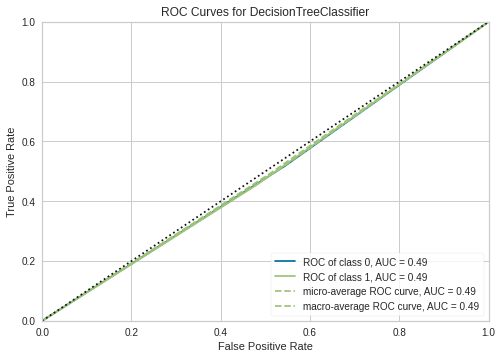

In [ ]:
classification.plot_model(classification_dt, plot = 'auc')

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=6c76daea8acca03a2f6ab1a2fe7aed62cf2ce20e20fe3d8962a48156c9a41522
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
classification.interpret_model(classification_xgb)

NameError: ignored